*Eduardus Tjitrahardja | @edutjie | 2022*

# Suppor Vector Machines

## Import Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [230]:
plt.style.use('seaborn')

## Load Libraries

In [231]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [232]:
iris.data.shape

(150, 4)

In [233]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [234]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [235]:
iris.target.shape

(150,)

In [236]:
target = pd.DataFrame(iris.target, columns=['species'])
target.head()

,species
0,0
1,0
2,0
3,0
4,0


In [237]:
# target['species'] = target.species.map(dict(enumerate(iris.target_names)))
target.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

## Split Data

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
# X = features.iloc[:, :2] # only use 2 features
# y = target.species

X = iris.data[:, :2] # use only 2 of 4 features
y = iris.target

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Train Model

In [241]:
from sklearn.svm import SVC

In [242]:
svm = SVC(kernel="rbf", C=1, gamma="auto")

In [243]:
svm.fit(X_train, y_train)

SVC(C=1, gamma='auto')

## Evaluate Model

In [244]:
svm_score = svm.score(X_test, y_test)
svm_score

0.7631578947368421

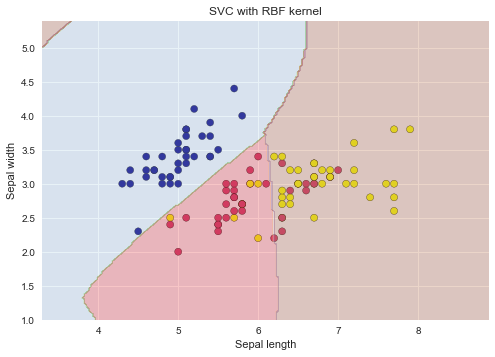

In [245]:
# create a mesh to plot in
# x_min, x_max = X['sepal length (cm)'].min() - 1, X['sepal length (cm)'].max() + 1
# y_min, y_max = X['sepal length (cm)'].min() - 1, X['sepal width (cm)'].max() + 1
# h = (x_max / x_min)/100
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#  np.arange(y_min, y_max, h))
# print(h)

# plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, cmap=plt.cm.Paired)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='plasma', s=50, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.subplot(1, 1, 1)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.25)
plt.show()

> https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8